In [1]:
import numpy as np

In [2]:
class DTW:
    def __init__(self, X, Y):
        self.X = np.asarray(X)
        self.Y = np.asarray(Y)
        self.nx = self.X.shape[0]
        self.ny = self.Y.shape[0]
    
    def _pointwise_distance(self):
        self.pt_dist = np.zeros((self.nx, self.ny))
        """
        TODO:
        calculate the pointwise distance matrix self.pt_dist
        """
        for i in range(self.nx):
            for j in range(self.ny):
                self.pt_dist[i][j] = np.linalg.norm(self.X[i] - self.Y[j])
                    
        return self.pt_dist
    
    def dynamic_programming(self):
        dist = self._pointwise_distance()
        self.gamma = np.zeros((self.nx, self.ny))
        """
        TODO:
        finish the dynamic programming problem to calculate the self.gamma matrix.
        """
        self.gamma[0][0] = dist[0][0]
        #for two borders
        for a in range(1, self.ny):
            self.gamma[0,a] = dist[0,a] + self.gamma[0, a-1]
        for b in range(1, self.nx):
            self.gamma[b,0] = dist[b,0] + self.gamma[b-1, 0]
        
        for i in range(1, self.nx):
            for j in range(1, self.ny):
                self.gamma[i][j] = dist[i][j] + min(self.gamma[i-1][j-1], self.gamma[i][j-1], self.gamma[i-1][j])
        return self.gamma
                
    
    def dtw_distance(self):
        self.dynamic_programming()
        
        return self.gamma[-1,-1] # You may change this to compromise with your implementation of self.gamma
    
    def back_track(self):
        """
        TODO: Bonus + 10 points
        return the best alignment
        """
        gamma = self.dynamic_programming()
        
        i = self.nx - 1
        j = self.ny - 1
        track = []
        track.append([i,j])
        #print('track', track)
        
        while i > 0 and j > 0:
            
            if gamma[i][j-1] == min(gamma[i-1][j-1], gamma[i][j-1], gamma[i-1][j]):
                track.append([i,j-1])
                j = j - 1
                
            elif gamma[i-1][j] == min(gamma[i-1][j-1], gamma[i][j-1], gamma[i-1][j]):
                track.append([i-1,j])
                i = i - 1
                
            else:
                if i == 0: #boundary condition
                    track.append([i, j - 1])
                    j = j -1
                elif j == 0: #boundary condition
                    track.append([i-1, j])
                    i = i -1
                else:
                    track.append([i-1, j - 1])
                    i = i - 1
                    j = j - 1

        track.append([0,0])
        return track

## Run those code blocks to calculate DTW distances

In [9]:
X_1 = np.array([[0,0], [1,1], [2,3], [3,2], [4,3], [5,7], [9,10], [11,13], [12,15]])
X_2 = np.array([[0,-1], [1,-0.5], [2,0.7], [3,1], [5,1], [6,9], [5,10], [4,7], [5,3.5],[8,10],[8,11], [11,11]])
dtw_X = DTW(X_1, X_2)
print(dtw_X.dtw_distance())
dtw_X = DTW(X_2, X_1)
print(dtw_X.dtw_distance())

26.309455142990338
26.309455142990338


In [9]:
Y_1 = np.asarray([[0,0],[4,3], [5,7], [9,10], [11,13], [12,15]])
Y_2 = np.asarray([[0,-1]])
dtw_Y = DTW(Y_1, Y_2)
print(dtw_Y.dtw_distance())
dtw_Y = DTW(Y_2, Y_1)
print(dtw_Y.dtw_distance())

68.10799959986574
68.10799959986574


In [11]:
Z_1 = np.array([[0,0],[1,1],[2,3],[3,2],[4,3]])
Z_2 = np.array([[0,-1],[1,-1],[2,1],[3,0]])
dtw_Z = DTW(Z_1, Z_2)
print(dtw_Z.dtw_distance())
dtw_Z = DTW(Z_2, Z_1)
print(dtw_Z.dtw_distance())

9.576491222541474
9.576491222541474


## Bonus with back_track (+10)

In [12]:
# Bonus
"""
Write code below to plot your best alignment results with your back_trace implementation
"""
trackX = DTW(X_1, X_2).back_track()
trackZ = DTW(Z_1, Z_2).back_track()

In [4]:
trackY = DTW(Y_1, Y_2).back_track()

In [13]:
trackX

[[8, 11],
 [7, 11],
 [6, 10],
 [6, 9],
 [5, 8],
 [5, 7],
 [5, 6],
 [5, 5],
 [4, 4],
 [3, 3],
 [2, 2],
 [1, 1],
 [0, 0],
 [0, 0]]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot(X, Y, track):
    plt.figure(figsize = (10,6))
    x1, x2 = X.T
    y1, y2 = Y.T
    plt.plot(x1, x2, color = 'blue', label = 'first sequence')
    plt.plot(y1, y2, color = 'red', label = 'second sequence')
    plt.legend(loc = 'best')
    
    for pair in track:
        i = pair[0]
        j = pair[1]
        a1, a2 = X[i].T
        b1, b2 = Y[j].T
        plt.plot([a1,b1], [a2,b2], linestyle = '--', linewidth = 1, color = 'black')
        
    plt.show()

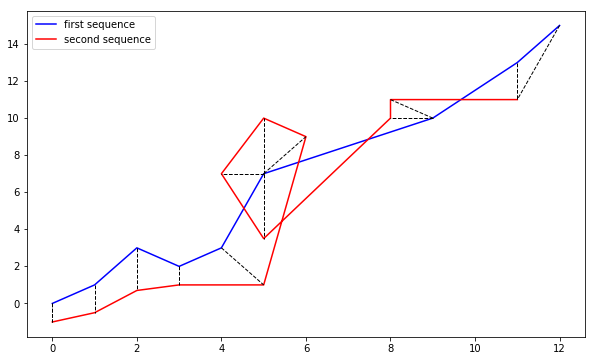

In [15]:
plot(X_1, X_2, trackX)

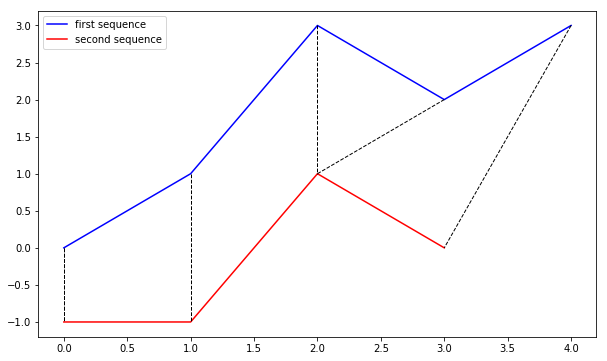

In [16]:
plot(Z_1, Z_2, trackZ)

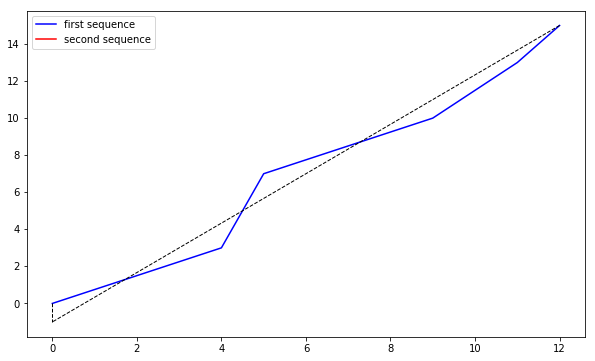

In [10]:
plot(Y_1, Y_2, trackY)